![Imgur](https://i.imgur.com/bqStdke.png)

![Imgur](https://i.imgur.com/uhsRGQB.png)

![Imgur](https://i.imgur.com/TSnhpUZ.png)

## svm in R

## install required packages

In [ ]:
install.packages("e1071")

## Load libraries

In [1]:
library(e1071)

## quick look at the data

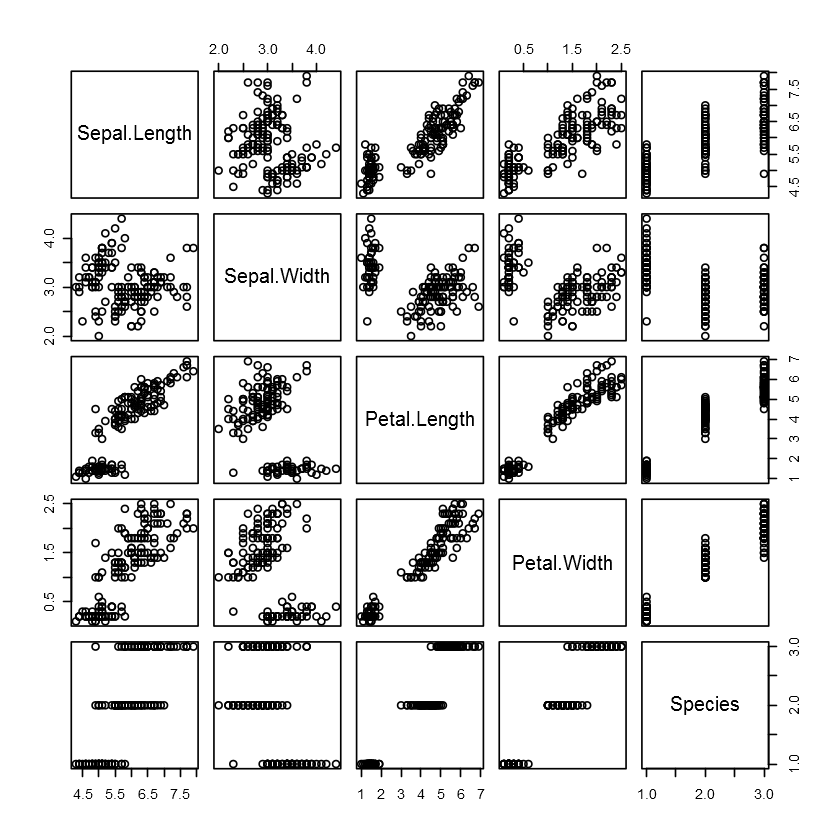

In [2]:
plot(iris)

## feature importance

In [ ]:
plot(iris$Sepal.Length, iris$Sepal.Width, col=iris$Species)

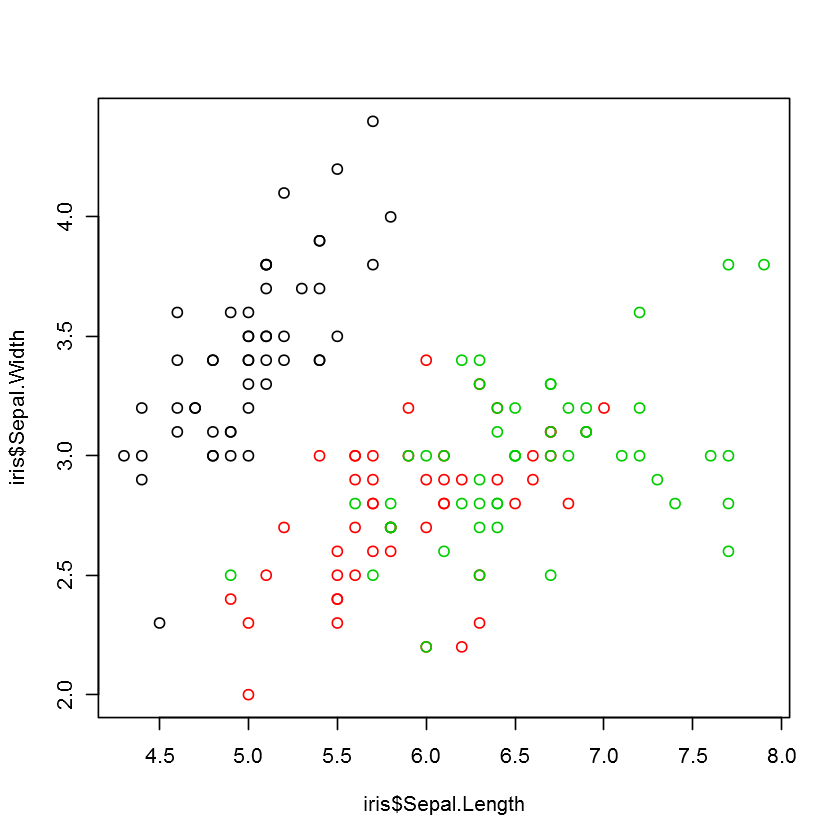

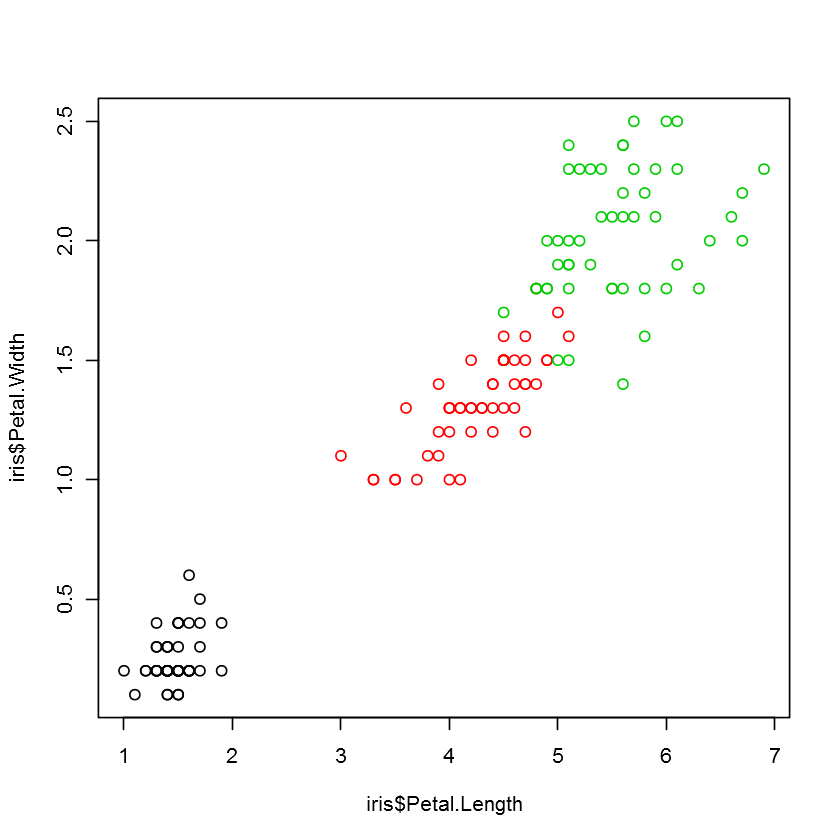

In [3]:
plot(iris$Petal.Length, iris$Petal.Width, col=iris$Species)

## split data

In [6]:
s <- sample(150, 100)
col <- c('Petal.Length','Petal.Width','Species')
iris_train <- iris[s,col]
iris_test <- iris[-s,col]

## create model


Call:
svm(formula = Species ~ ., data = iris_train, kernel = "linear", 
    cost = 0.1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  48



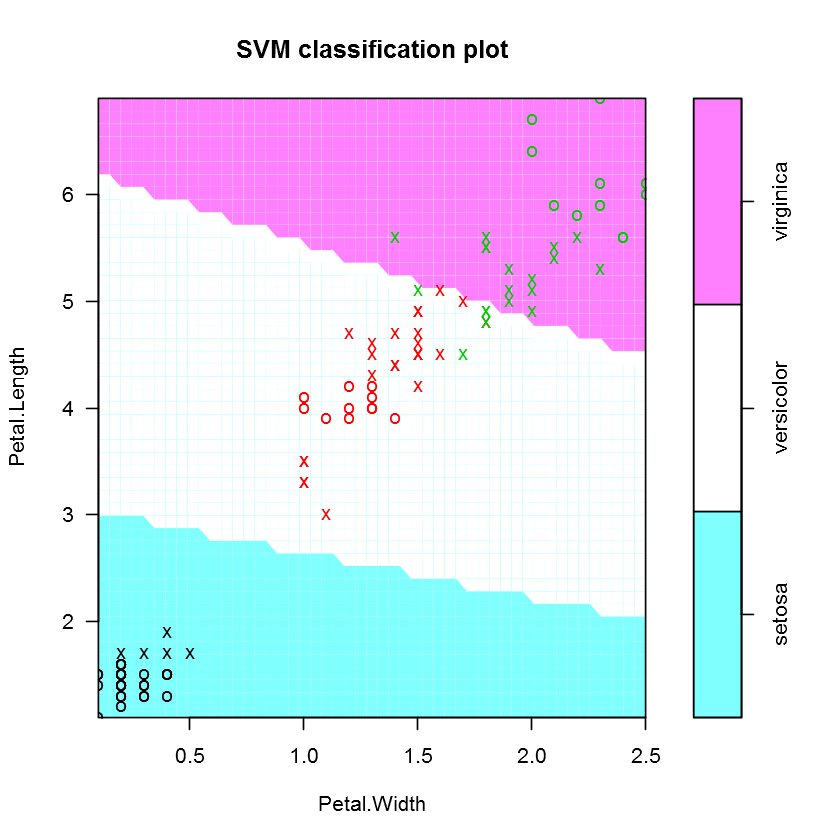

In [7]:
svmfit <- svm(Species ~ ., data = iris_train, kernel="linear", cost=.1, scale = FALSE)
print(svmfit)
plot(svmfit, iris_train[, col])

In [8]:
tuned <- tune(svm, Species ~ ., data = iris_train, kernel = "linear", ranges = list(cost = c(0.001, 
    0.01, 0.1, 1.1, 100)))  # best cast parameter cross validation
summary(tuned)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.04 

- Detailed performance results:
     cost error dispersion
1   0.001  0.63 0.26267851
2   0.010  0.31 0.11005049
3   0.100  0.04 0.05163978
4   1.100  0.05 0.05270463
5 100.000  0.06 0.06992059


            
p            setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         2
  virginica       0          0        18

[1] 0.96

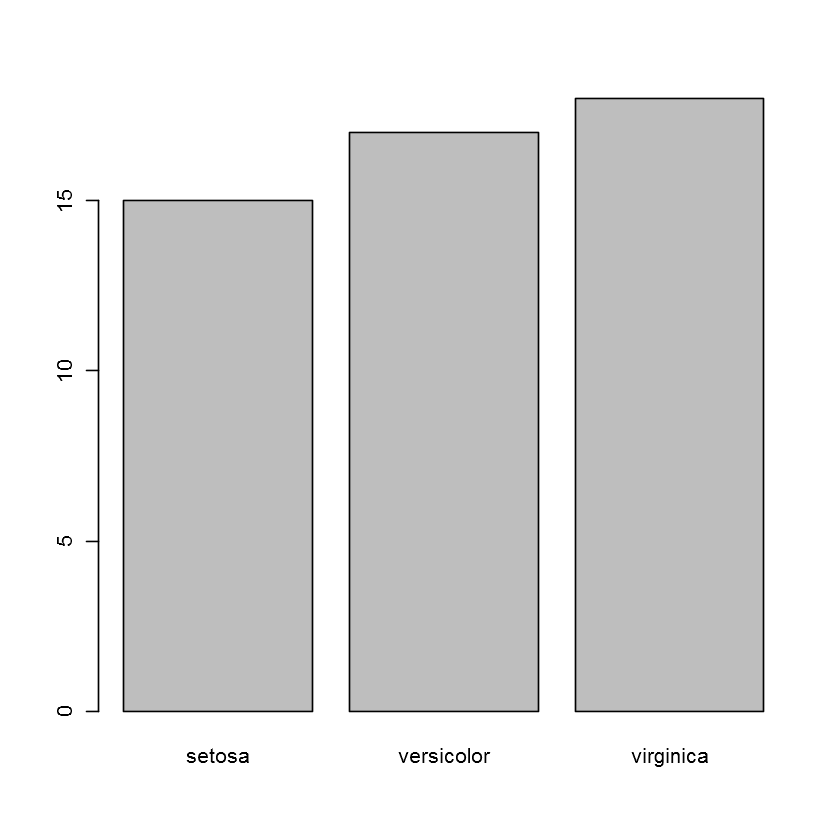

In [9]:
p <- predict(svmfit, iris_test[,col], type='class')
plot(p)
table(p, iris_test[,3])
mean(p==iris_test[,3])